In [1]:
import madmom
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

### Librosa

In [2]:
#Chroma feature Librosa stft
def Chroma_freature_librosa_stft(uploaded_file_name):
    y, sr =librosa.load(uploaded_file_name)

    chroma_librosa_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    return chroma_librosa_stft


In [3]:
#Chroma feature Librosa cqt
def Chroma_freature_librosa_cqt(uploaded_file_name):
    y, sr =librosa.load(uploaded_file_name)

    chroma_librosa_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

    return chroma_librosa_cqt


In [4]:
#Chroma feature Librosa cens
def Chroma_freature_librosa_cens(uploaded_file_name):
    y, sr =librosa.load(uploaded_file_name)

    chroma_librosa_cens = librosa.feature.chroma_cens(y=y, sr=sr)

    return chroma_librosa_cens


In [5]:
#Enhanced chroma
def Chroma_feature_librosa_enhanced(uploaded_file_name):
    y, sr = librosa.load(uploaded_file_name)

    y_harm = librosa.effects.harmonic(y=y, margin=8)

    chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr)
    chroma_filter = np.minimum(chroma_harm, librosa.decompose.nn_filter(chroma_harm, aggregate=np.median, metric= 'cosine'))
    crhoma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1,9))
    
    return crhoma_smooth

In [6]:
# t_sampl = 1/sr
# time_of_hop = t_sampl * 512

# time = time_of_hop * np.arange(0,chroma_librosa_stft.shape[1],1)
# time


### Madmom

In [7]:
#Chroma feature Madmom
def Chroma_feature_madmom(uploaded_file_name):
    dcp = madmom.audio.DeepChromaProcessor()
    chroma_madmom_deep = dcp(uploaded_file_name)
    chroma_madmom_deep = np.transpose(chroma_madmom_deep)
    return chroma_madmom_deep

### Aubio

Aubio neposkytuje přímý výpočet chromavektorů

### Zobrazení grafů

In [8]:
def Print_graphs(chroma_librosa_stft, chroma_librosa_cqt, chroma_librosa_cens, chroma_librosa_enhanced, chroma_madmom_deep,uploaded_file_name):
    xmin_time = 0; # Čas skladby, oa kterého se vykreslí grafy.
    xmax_time = 60; # Čas skladby, do kterého se vykreslí grafy.
    fig, ax = plt.subplots(6,1, figsize=(20,10))

    hop_length = 512

    y, sr = librosa.load(uploaded_file_name)
    M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)
    librosa.display.specshow(librosa.power_to_db(M, ref=np.max), y_axis='mel', x_axis='time', hop_length=hop_length, ax=ax[0])
    
    ax[0].label_outer()
    ax[0].set(title='Mel spectrogram')
    ax[0].set_xlim(xmin=xmin_time, xmax=xmax_time)

    img = librosa.display.specshow(chroma_librosa_stft, y_axis='chroma', x_axis='time', ax=ax[1])
    ax[1].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[1].set_title("Librosa chroma stft")

    librosa.display.specshow(chroma_librosa_cqt, y_axis='chroma', x_axis='time', ax=ax[2])
    ax[2].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[2].set_title("Librosa chroma cqt")

    librosa.display.specshow(chroma_librosa_cens, y_axis='chroma', x_axis='time', ax=ax[3])
    ax[3].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[3].set_title("Librosa chroma cens")

    librosa.display.specshow(chroma_librosa_enhanced, y_axis='chroma', x_axis='time', ax=ax[4])
    ax[4].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[4].set_title("Librosa chroma enhaced")

    librosa.display.specshow(chroma_madmom_deep, sr=sr, hop_length=2204, y_axis='chroma', x_axis='time', ax=ax[5])
    ax[5].set_xlim(xmin=xmin_time, xmax=xmax_time)
    ax[5].set_title("Madmom chroma Deep")

    fig.colorbar(img, ax=ax)
    
    return

In [9]:
def Chromavectors_analyse(uploaded_file_name):
    start_time =time.time()
    chroma_librosa_stft = Chroma_freature_librosa_stft(uploaded_file_name)
    time_librosa_stft = time.time() - start_time 

    start_time = time.time()
    chroma_librosa_cqt = Chroma_freature_librosa_cqt(uploaded_file_name)
    time_librosa_cqt = time.time() - start_time

    start_time = time.time()
    chroma_librosa_cens = Chroma_freature_librosa_cens(uploaded_file_name)
    time_librosa_cens = time.time() - start_time

    start_time = time.time()
    chroma_librosa_enhaced = Chroma_feature_librosa_enhanced(uploaded_file_name)
    time_librosa_enhanced = time.time() - start_time

    start_time = time.time()
    chroma_madmom_deep = Chroma_feature_madmom(uploaded_file_name)
    time_madmom_deep = time.time() - start_time

    print("Čas trvání výpočtu Librosa stft:",f"{time_librosa_stft: .4f}","s")
    print("Čas trvání výpočtu Librosa cqt:",f"{time_librosa_cqt: .4f}","s")
    print("Čas trvání výpočtu Librosa cens:",f"{time_librosa_cens: .4f}","s")
    print("Čas trvání výpočtu Librosa enhanced:",f"{time_librosa_enhanced: .4f}","s")
    print("Čas trvání výpočtu Madmom deep:",f"{time_madmom_deep: .4f}","s")

    Print_graphs(chroma_librosa_stft, chroma_librosa_cqt, chroma_librosa_cens, chroma_librosa_enhaced, chroma_madmom_deep,uploaded_file_name)
    return

Čas trvání výpočtu Librosa stft:  1.5711 s
Čas trvání výpočtu Librosa cqt:  1.0455 s
Čas trvání výpočtu Librosa cens:  1.0058 s
Čas trvání výpočtu Librosa enhanced:  12.2885 s
Čas trvání výpočtu Madmom deep:  0.2075 s


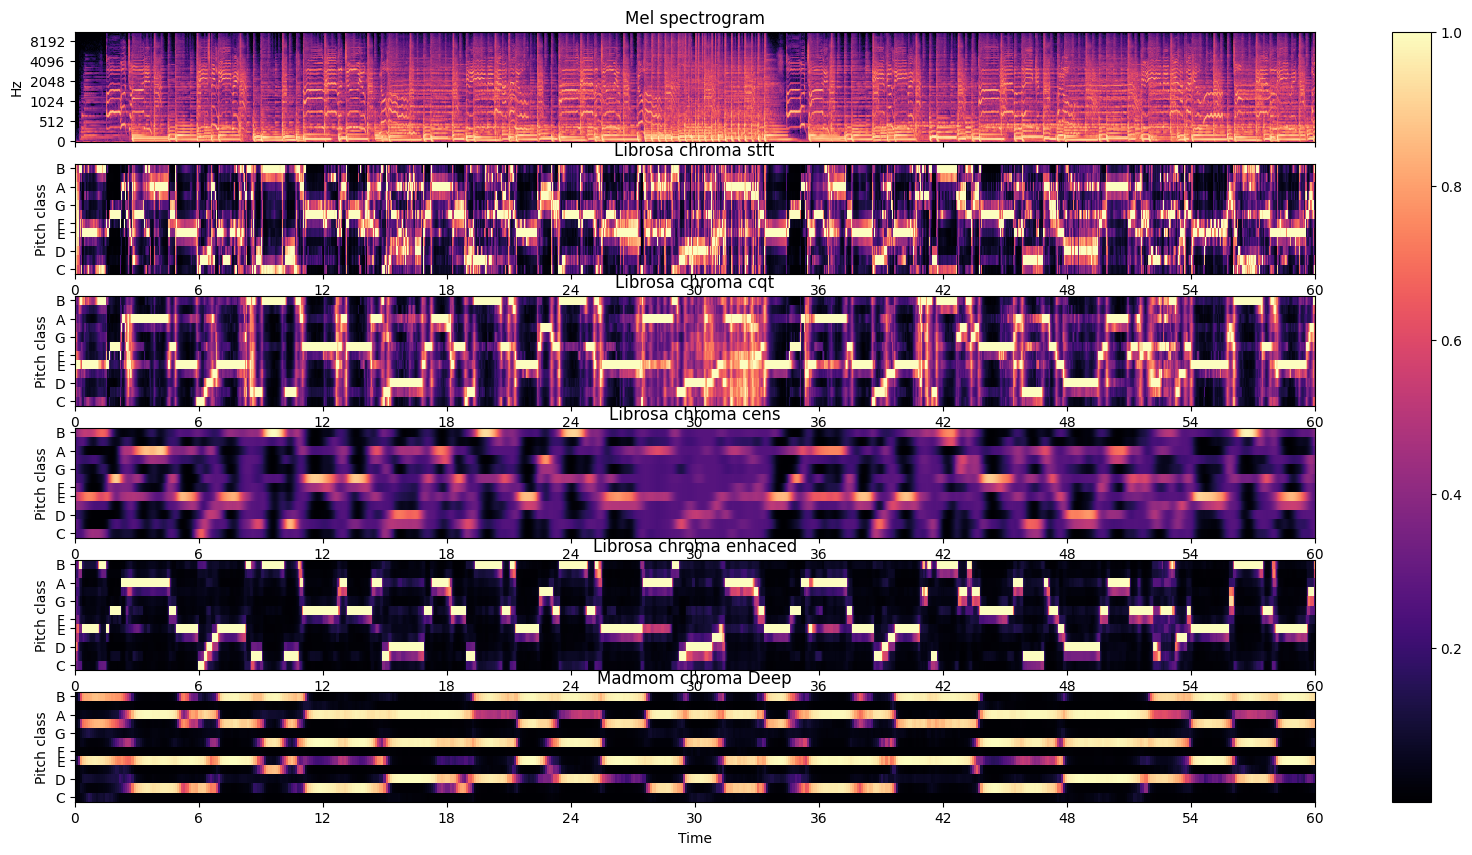

In [10]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/04.-Oh! Darling.wav"
Chromavectors_analyse(uploaded_file_name)

Čas trvání výpočtu Librosa stft:  0.4646 s
Čas trvání výpočtu Librosa cqt:  1.2148 s
Čas trvání výpočtu Librosa cens:  1.1947 s
Čas trvání výpočtu Librosa enhanced:  15.6996 s
Čas trvání výpočtu Madmom deep:  0.2373 s


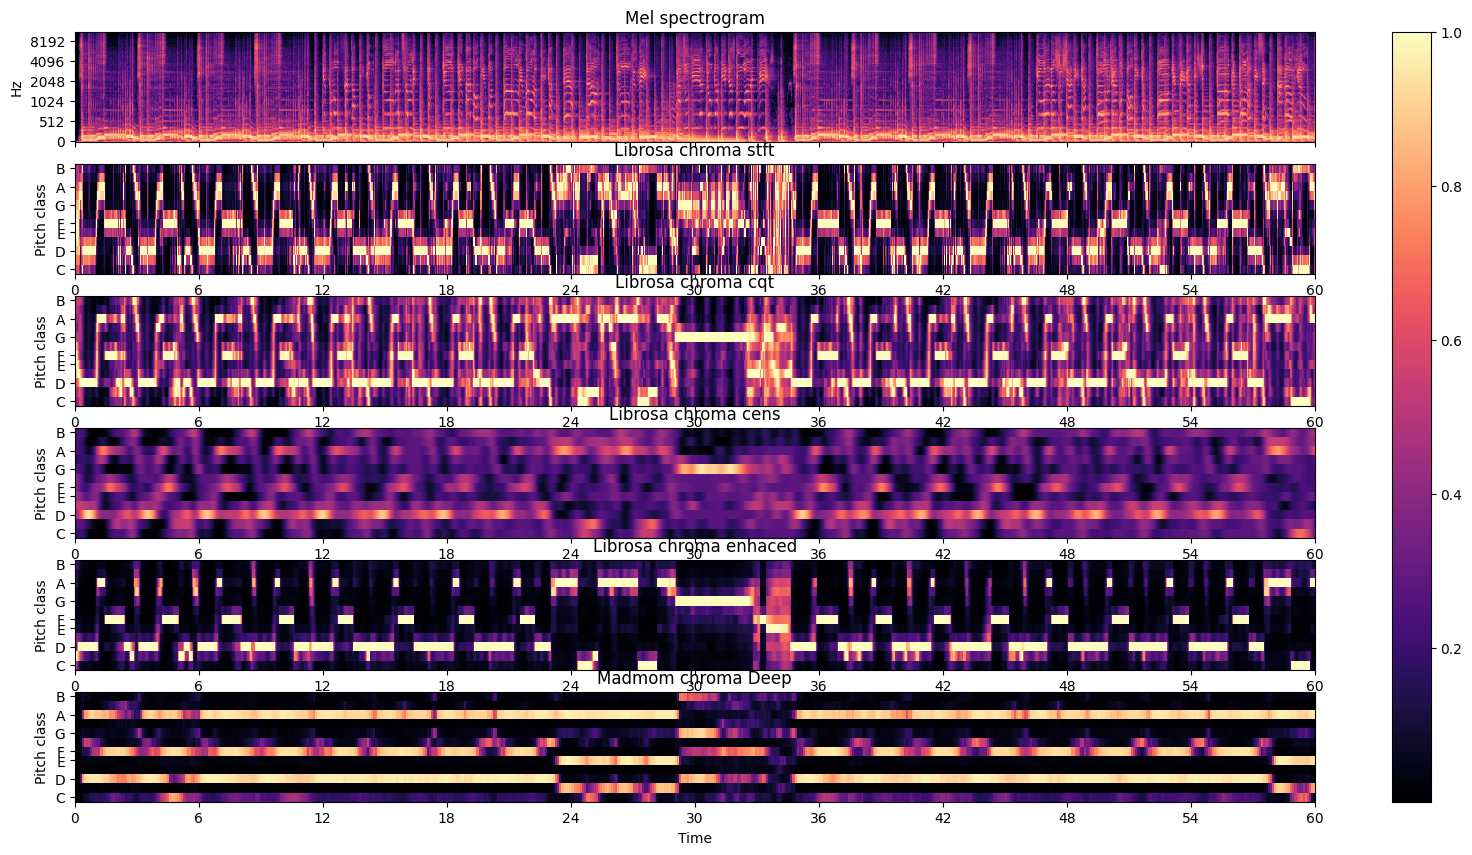

In [11]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/01.-Come Together.wav"
Chromavectors_analyse(uploaded_file_name)

Čas trvání výpočtu Librosa stft:  0.3354 s
Čas trvání výpočtu Librosa cqt:  0.8837 s
Čas trvání výpočtu Librosa cens:  0.9582 s
Čas trvání výpočtu Librosa enhanced:  10.7069 s
Čas trvání výpočtu Madmom deep:  0.1794 s


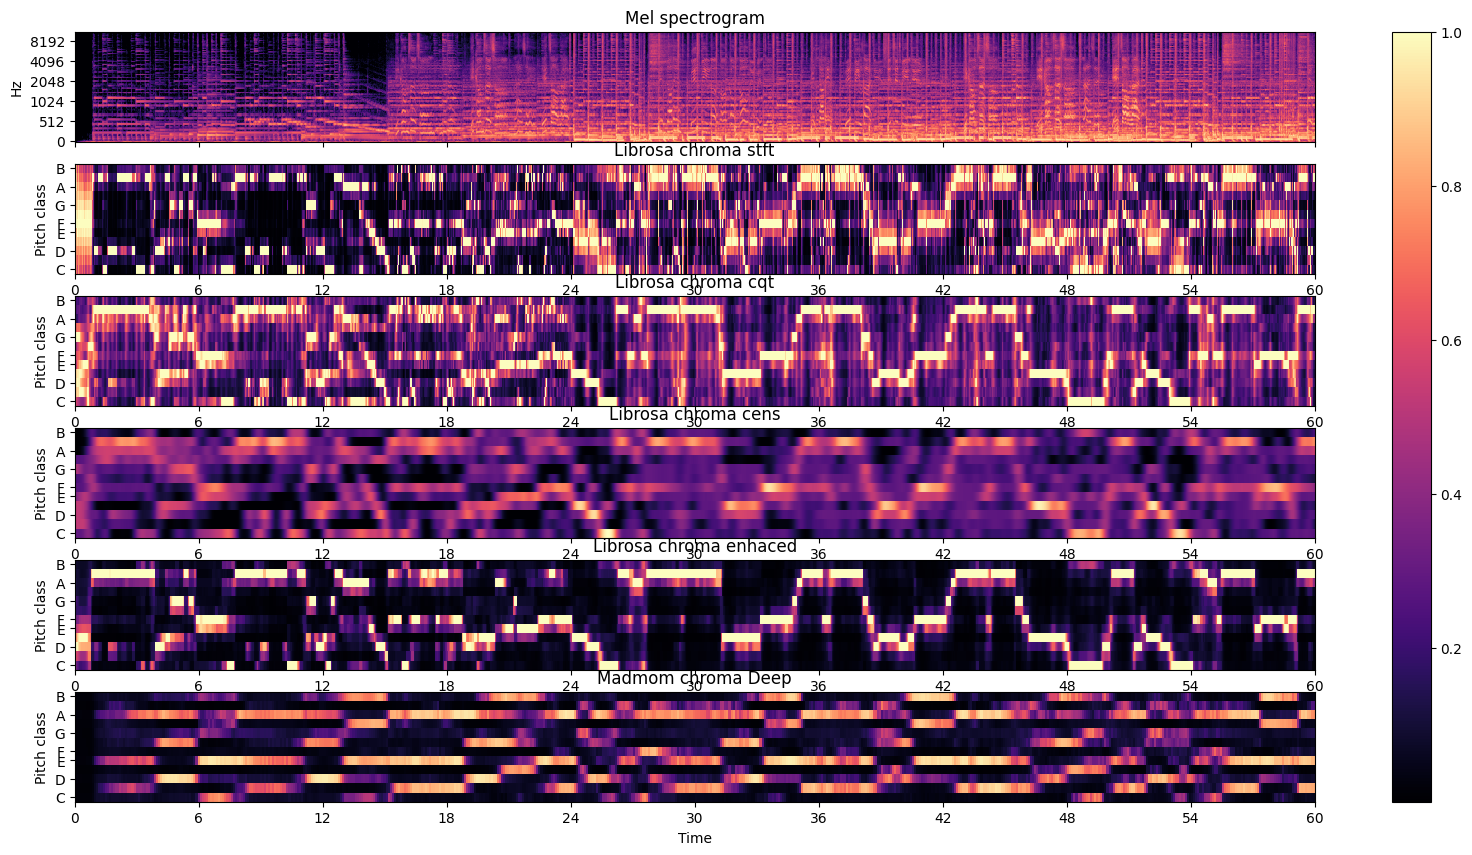

In [12]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/07.-Here Comes The Sun.wav"
Chromavectors_analyse(uploaded_file_name)

Čas trvání výpočtu Librosa stft:  0.2677 s
Čas trvání výpočtu Librosa cqt:  0.7361 s
Čas trvání výpočtu Librosa cens:  0.7264 s
Čas trvání výpočtu Librosa enhanced:  8.7750 s
Čas trvání výpočtu Madmom deep:  0.1397 s


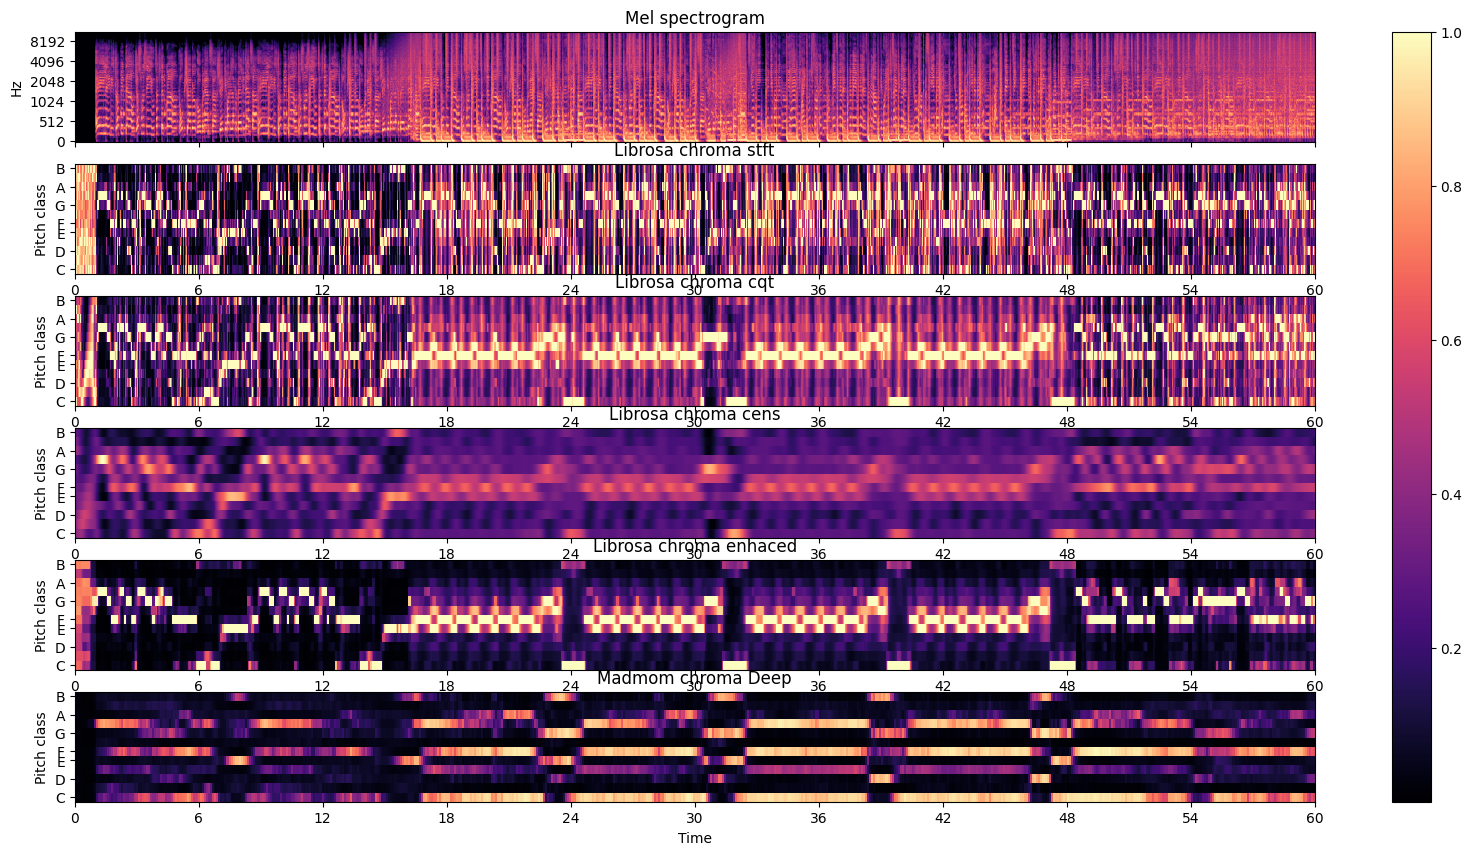

In [13]:
uploaded_file_name = "Referencni_skladby/Imanbek & BYOR - Belly Dancer (Official Music Video).wav"
Chromavectors_analyse(uploaded_file_name)